## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.

mouse_count_unique = len(combined_results_df["Mouse ID"].unique())
mouse_count_unique

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# we want only unique Mouse ID + Timepoint values

duplicateRows_df = combined_results_df[combined_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = combined_results_df[combined_results_df['Mouse ID'] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results_df = combined_results_df[combined_results_df['Mouse ID'] != "g989"]
cleaned_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_cleaned_unique = len(cleaned_results_df["Mouse ID"].unique())
mouse_cleaned_unique

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#filter the dataframe to show only Drug Regimen and Tumor Volume
summary_df = cleaned_results_df.groupby(['Drug Regimen'])
summary_df.head()
#group by Drug Regimen and calculate mean, median, variance, std dev, and std err

tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_mean
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_median
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_var
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_std
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()
tumor_sem

summary_stats = pd.DataFrame({'Mean Tumor Vol': tumor_mean, 
                             'Median Tumor Vol': tumor_median,
                             'Tumor Vol Variance': tumor_var,
                             'Tumor Vol Std Dev': tumor_std,
                             'Tumor Vol Std Err': tumor_sem})
summary_stats

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Optional: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

grouped = cleaned_results_df.groupby(['Drug Regimen'])
grouped['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, np.sem])

# This method produces everything in a single groupby function

AttributeError: module 'numpy' has no attribute 'sem'

## Bar Plots

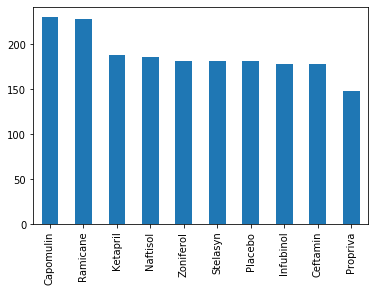

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
treatmentRegimen = cleaned_results_df[["Drug Regimen"]]
#treatmentRegimen.head()
treatmentRegimen = cleaned_results_df['Drug Regimen'].value_counts()
treatmentRegimen.plot.bar()

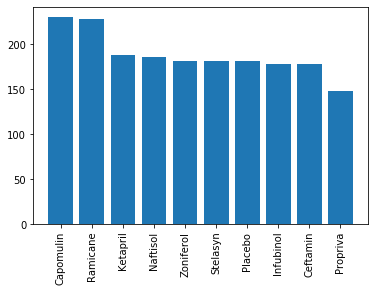

In [56]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import numpy as np
counts = cleaned_results_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values, treatmentRegimen, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.show()



## Pie Plots

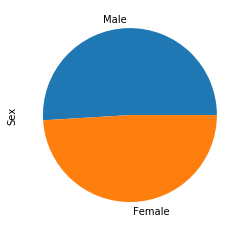

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = cleaned_results_df['Sex'].value_counts()
mouse_gender
mouse_gender.plot.pie()

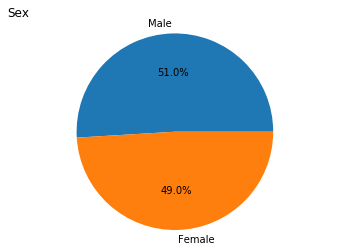

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = cleaned_results_df.groupby("Sex")
mouse_gender_count = cleaned_results_df["Sex"].value_counts()

labels = ["Male", "Female"]

plt.title('Sex', loc='left') #couldn't quite get the correct location for this
plt.pie(mouse_gender_count, labels=labels, autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  

ftv_df = cleaned_results_df.loc[cleaned_results_df.groupby('Mouse ID')['Timepoint'].idxmax(), :]
ftv_df.sort_values('Tumor Volume (mm3)')


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ftv = ftv_df['Tumor Volume (mm3)']
quartiles = ftv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)


45.87586684749999
65.05362410500001
19.17775725750002


In [86]:
# Quantitatively determine capomulin outliers
ftv_capomulin = ftv_df[ftv_df['Drug Regimen'] == "Capomulin"]
ftv_capo_cleaned = ftv_capomulin.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]].head
ftv_capo_cleaned
quartiles = ftv_capo_cleaned.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

AttributeError: 'function' object has no attribute 'quantile'

In [ ]:
# Quantitatively determine ramicane outliers
ftv_ramicane = ftv_df[ftv_df['Drug Regimen'] == "Ramicane"]
ftv_ramc_cleaned = ftv_ramicane.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]].head
ftv_ramc_cleaned
quartiles = ftv_ramc_cleaned.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

In [ ]:
# Quantitatively determine infubinol outliers
ftv_infubinol = ftv_df[ftv_df['Drug Regimen'] == "Infubinol"]
ftv_infb_cleaned = ftv_infubinol.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]].head
ftv_infb_cleaned
quartiles = ftv_infb_cleaned.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

In [ ]:
# Quantitatively determine ceftamin outliers
ftv_ceftamin = ftv_df[ftv_df['Drug Regimen'] == "Ceftamin"]
ftv_ceft_cleaned = ftv_ceftamin.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]].head
ftv_ceft_cleaned
quartiles = ftv_ceft_cleaned.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(lowerq)
print(upperq)
print(iqr)

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#filter dataframe by
fig1, ax1 = plt.subplots()
ax.boxplot(())
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ftv_capo_cleaned)
ax1.boxplot(ftv_ramc_cleaned)
ax1.boxplot(ftv_infb_cleaned)
ax1.boxplot(ftv_ceft_cleaned)
plt.show()

TypeError: 'str' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
